# Data Mining — Linear Regression — Mini-Project 1 (Energy Consumption)

**Course:** [CSEN911] Data Mining (Winter 2025)  
**Instructor:** Dr. Ayman Alserafi  
**Due:** 24 October 2025, 11:59 PM

**Dataset:** `energy_data.csv`  


> **Instructions:** For every step, write your own explanations and justifications and visualization in the provided Markdown prompts.




***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Farah Ehab

ID:58-4100

Tutorial: 02

---

Name: Zeina Ossama

ID:58-2093

Tutorial: 02

---


The dataset contains building-level energy readings and contextual attributes.

Each row represents a building observation. Columns include:

<div style="font-size:20px;">

| **Column** | **Description** |
|-------------|-----------------|
| **Building_ID** | Unique identifier for each building record. Used to distinguish one building entry from another. |
| **Building_Type** | Category describing the primary use of the building (e.g., Residential, Commercial, Industrial, Educational, etc.). |
| **Governorate** | The administrative region (governorate) where the building is located (e.g., Cairo, Giza, Alexandria). |
| **Neighborhood** | The smaller district or local area within the governorate where the building is located. |
| **Day_of_Week** | The day on which the energy consumption measurement was recorded (e.g., Sunday, Monday, etc.). |
| **Occupancy_Level** | The relative number of occupants or activity level in the building, typically categorized as *Low*, *Medium*, or *High*. |
| **Appliances_Usage_Level** | Indicates how intensively appliances are used in the building *Low*, *Medium*, or *High*. |
| **SquareFootage** | The total floor area of the building (numeric). Serves as a proxy for building size, often influencing energy usage. |
| **Last_Maintenance_Date** | The date of the last maintainance done on the building. |
| **Average_Temperature** | The average ambient temperature (in °C) recorded during the data period. |
| **Energy_Consumption** | The total energy used by the building, typically measured in kilowatt-hours (kWh).|

</div>


## Importing Libraries & Dataset

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('energy_data.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2025/refs/heads/main/data/energy_data.csv')

df.head()

,Building_ID,Building_Type,Governorate,Neighborhood,Day_of_Week,Occupancy_Level,Appliances_Usage_Level,SquareFootage,Last_Maintenance_Date,Average_Temperature,Energy_Consumption
0,BLD-1000-UD,Residential,Alexandria,Smouha,WeDnesday,High,Low,7063m2,2020-01-01,28.61,2713.95 kWh
1,BLD-1001-AX,Commercial,Giza,+Mohandessin14,tuesDAY,High,High,44372m2,2022-02-24,NaN,5744.99 kWh
2,BLD-1002-IH,Industrial,Cairo,New Cairo,SunDay,Medium,Low,19255,2021-02-22,37.88,4101.24 kWh
3,BLD-1003-HE,NaN,NaN,+92Dokki,TuesDay,Low,High,13265,2023-07-30,35.06,3009.14 kWh
4,BLD-1004-XD,Commercial,Alexandria,Smouha,Monday,Low,Low,13375,2022-08-12,28.82,3279.17 kWh


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [81]:
df.head(10)
df.tail()
df.shape
df.isnull().sum()
df.duplicated().sum()
df['Governorate'].value_counts()
df['Neighborhood'].value_counts()

,count
Neighborhood,
Smouha,45
Gleem,44
Dokki,41
Mohandessin,38
New Cairo,32
...,...
%Smouha42,1
+Maadi7,1
^Dokki97,1


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [84]:
df=df.drop_duplicates()
df['Day_of_Week'] = df['Day_of_Week'].str.capitalize()
df['Neighborhood'] = df['Neighborhood'].str.extract('([a-zA-Z\\s]+)', expand=False).str.strip()
df['Average_Temperature']= df['Average_Temperature'].fillna(df['Average_Temperature'].median())
mapping = {
    'Smouha': 'Alexandria',
    'Gleem': 'Alexandria',
    'Dokki': 'Giza',
    'Mohandessin': 'Giza',
    'New Cairo': 'Cairo',
    'Maadi': 'Cairo',
    'Heliopolis': 'Cairo'
}
df['Governorate'] = df['Neighborhood'].map(mapping).fillna('Unknown')
df['Building_Type'] = df['Building_Type'].fillna(df['Building_Type'].mode()[0])
df['SquareFootage'] = df['SquareFootage'].str.replace(r'\s*m2', ' m²', regex=True)
df['SquareFootage'] = df['SquareFootage'].apply(
    lambda x: x if 'm²' in x else f"{x} m²"
)

print(df)


      Building_ID Building_Type Governorate Neighborhood Day_of_Week  \
0     BLD-1000-UD   Residential  Alexandria       Smouha   Wednesday   
1     BLD-1001-AX    Commercial        Giza  Mohandessin     Tuesday   
2     BLD-1002-IH    Industrial       Cairo    New Cairo      Sunday   
3     BLD-1003-HE   Residential        Giza        Dokki     Tuesday   
4     BLD-1004-XD    Commercial  Alexandria       Smouha      Monday   
...           ...           ...         ...          ...         ...   
1095  BLD-2095-OH    Commercial        Giza        Dokki    Saturday   
1096  BLD-2096-RH   Residential        Giza        Dokki      Sunday   
1097  BLD-2097-JZ    Commercial        Giza  Mohandessin      Sunday   
1098  BLD-2098-ZP    Industrial  Alexandria       Smouha    Saturday   
1099  BLD-2099-GL   Residential       Cairo    New Cairo      Friday   

     Occupancy_Level Appliances_Usage_Level SquareFootage  \
0               High                    Low       7063 m²   
1            

<Axes: >

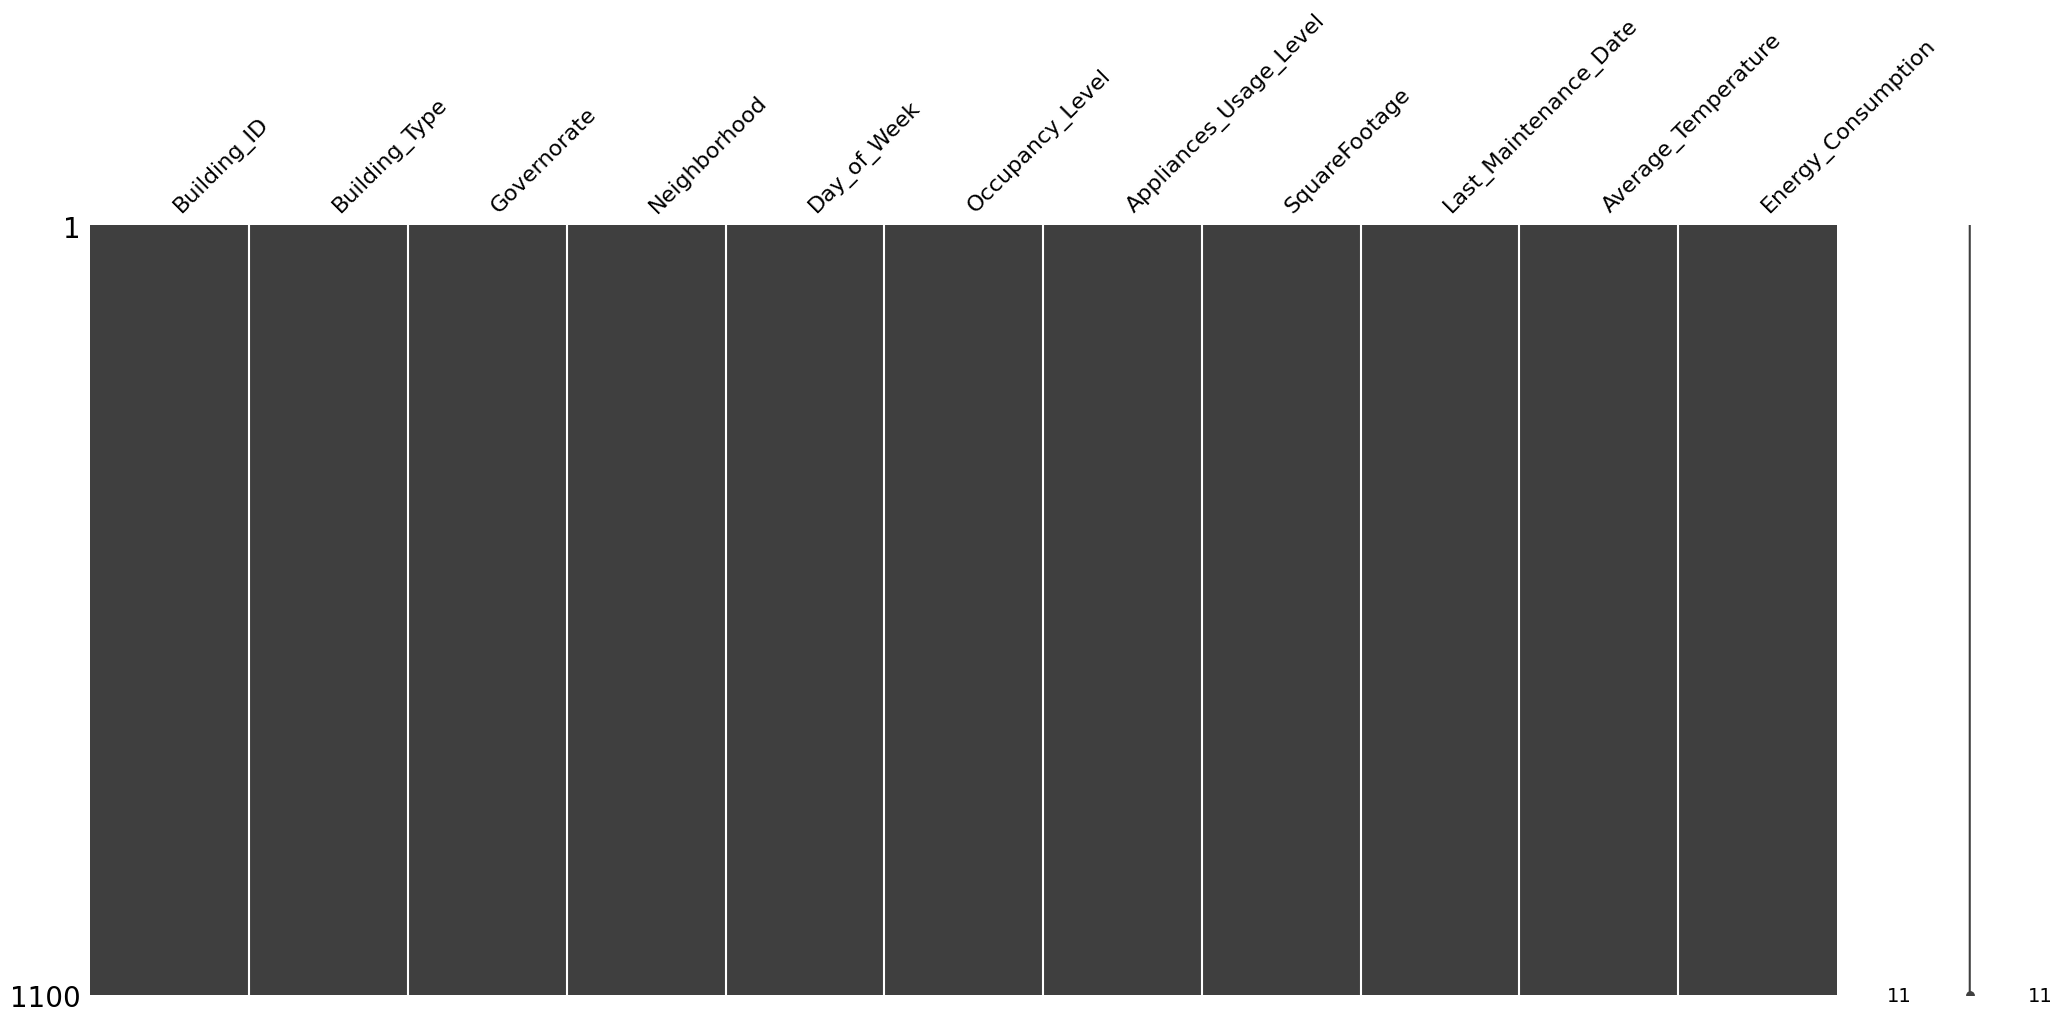

In [85]:
import missingno as msno
msno.matrix(df)

## Exploratory Data Analysis

**Q1:** What are the most popular neighborhoods? plot all and order them on the graph (mention top 3)

**Visualization**

**Answer for Q1:** _Your answer here_

**Q2:** Show the distribution of the energy consumption of each Building type.

Which type have the widest distribution of energy consumption?

Which (on average) has the highest consumption?.

**Visualization**

**Answer for Q2:** _Your answer here_

**Q3:** How does the building size affect energy consumption?

**Visualization**

**Answer for Q3:** _Your answer here_

**Q4:** Do buildings consume more energy if not maintained frequently?

**Visualization**

**Answer for Q4:** _Your answer here_

**Q5:** Are all the numerical variables normally distributed, or is there any skewness?

**Visualization**

**Answer for Q5:** _Your answer here_

**Q6:** What is multicollinearity? And why is it a problem for linear regression? Does this problem exist in this
dataset?

**Visualization**

**Answer for Q6:** _Your answer here_

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

## Modelling

_Apply the linear regression model below._

## Model Evaluation

Evaluate the model you applied.

## Conclusion and Recommendations

Comment on the model performance and your findings from model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for an electrcity company aiming to estimate the energy levels of each building?

**Answer**: your answer here.